In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path

DATA_DIR = Path('../data')
rng = np.random.default_rng()

# Logistic Regression
## Visualizing the data


In [2]:
data =  np.loadtxt(DATA_DIR / 'ex2data1.txt', delimiter=',')
m = data.shape[0]
X = np.hstack((np.ones((m, 1)), data[:, :2]))
y = data[:, -1:]
print(f'{X=!s}\n\n{y=!s}')

# theta = np.zeros((X.shape[1], 1))

theta = np.zeros((X.shape[1]))

X=[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.         62.271013

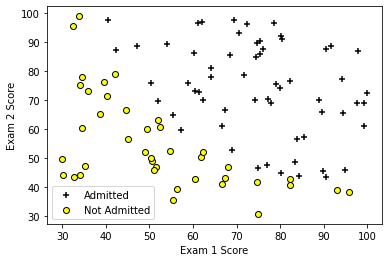

In [3]:
fig, ax = plt.subplots()

admitted_idx = (y==1).T[0]
not_admitted_idx = ~admitted_idx

admitted = X[admitted_idx]
not_admitted = X[~admitted_idx]

ax.scatter(
    admitted[:, 1],
    admitted[:, 2],
    c='black',
    marker='+',
    label='Admitted',
)
ax.scatter(
    not_admitted[:, 1],
    not_admitted[:, 2],
    c='yellow',
    marker='o',
    edgecolors='black',
    label='Not Admitted',
)

ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

ax.legend()

In [4]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))


### 代价函数和梯度



In [5]:
def compute_cost(theta, X, y):
    # warning: theta 为一维行向量
    h = sigmoid(X @ np.expand_dims(theta, axis=1))
    return (((-y.T @ np.log(h) + (y - 1).T @ np.log(1 - h)) / len(X))).item()


In [6]:
def compute_gradient(theta, X, y):
    m = len(X)
    return X.T @ (sigmoid(X @ np.expand_dims(theta, axis=1)) - y) / m

In [7]:
print(f'{compute_cost(theta, X, y) = }')
print(compute_gradient(theta, X, y))


compute_cost(theta, X, y) = 0.6931471805599453
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [8]:
from scipy.optimize import fmin_tnc

g, iters, rc = fmin_tnc(
    func=compute_cost,
    x0=theta,
    # fprime若为 None，func 应返回 cost 和 gradient
    fprime=compute_gradient,
    # 将会传递给 func (and fprime)
    args=(X, y),
)
print(f'{g = !s}\n{iters = }\n{rc = }')

g = [-25.16131857   0.20623159   0.20147149]
iters = 36
rc = 0


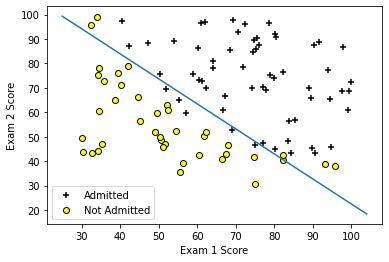

In [9]:
admitted_idx = (y==1).T[0]
not_admitted_idx = ~admitted_idx
admitted = X[admitted_idx]
not_admitted = X[~admitted_idx]

x1 = np.arange(25, 105, 1)
x2 = -(g[1]*x1 + g[0]) / g[2]

fig, ax = plt.subplots()

ax.scatter(
    admitted[:, 1],
    admitted[:, 2],
    c='black',
    marker='+',
    label='Admitted',
)
ax.scatter(
    not_admitted[:, 1],
    not_admitted[:, 2],
    c='yellow',
    marker='o',
    edgecolors='black',
    label='Not Admitted',
)
ax.plot(x1, x2)

ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
ax.legend()

In [10]:
def predict(x1, x2):
    return sigmoid(([1, x1, x2]*g).sum()) >= 0.5

predict(45, 85)

True

# 正则化逻辑回归

In [11]:
data =  np.loadtxt(DATA_DIR / 'ex2data2.txt', delimiter=',')
m = data.shape[0]
# X = np.hstack((np.ones((m, 1)), data[:, :2]))
y = data[:, -1:]
print(f'{X=!s}\n\n{y=!s}')


X=[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.         62.271013

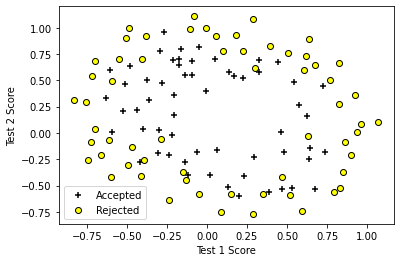

In [12]:
fig, ax = plt.subplots()

accepted_idx = (y==1).T[0]
not_accepted_idx = ~accepted_idx

accepted = data[accepted_idx, :-1]
not_accepted = data[~accepted_idx, :-1]

ax.scatter(
    accepted[:, 0],
    accepted[:, 1],
    c='black',
    marker='+',
    label='Accepted',
)
ax.scatter(
    not_accepted[:, 0],
    not_accepted[:, 1],
    c='yellow',
    marker='o',
    edgecolors='black',
    label='Rejected',
)

ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

ax.legend()

## Feature Mapping

In [13]:
def map_feature(X1, X2, power):
    X = np.empty((len(X1), (power+1)*(power+2) // 2))
    X[:, 0] = 1
    for i in range(1, power+1):
        base_idx = i*(i+1) // 2
        for j in range(i+1):
            # print(f'{base_idx+j}:\t{(i-j, j)}', end='\n')
            X[:, base_idx+j] = X1**(i-j) * X2**j
    return X

power = 6
X = map_feature(data[:, 0], data[:, 1], power)
theta = np.zeros(X.shape[1])

In [14]:
def reg_cost_fn(theta, X, y, reg_param=1):
    theta = np.expand_dims(theta, axis=1)
    m = len(X)
    h = sigmoid(X @ theta)
    t = theta[1:]
    reg = reg_param / (2*m) * (t.T @ t)
    return (((-y.T @ np.log(h) + (y - 1).T @ np.log(1 - h)) / len(X)) + reg).item()

In [15]:
def reg_gradient_fn(theta, X, y, reg_param=1):
    theta = np.expand_dims(theta, axis=1)
    m = len(X)
    reg = reg_param * np.concatenate((np.zeros((1,1)), theta[1:]))
    # print(reg)
    return (X.T @ (sigmoid(X @ theta) - y) +reg) / m


In [16]:
print(f'{reg_cost_fn(theta, X, y,) = }')
reg_gradient_fn(theta, X, y,)


reg_cost_fn(theta, X, y,) = 0.6931471805599454


array([[8.47457627e-03],
       [1.87880932e-02],
       [7.77711864e-05],
       [5.03446395e-02],
       [1.15013308e-02],
       [3.76648474e-02],
       [1.83559872e-02],
       [7.32393391e-03],
       [8.19244468e-03],
       [2.34764889e-02],
       [3.93486234e-02],
       [2.23923907e-03],
       [1.28600503e-02],
       [3.09593720e-03],
       [3.93028171e-02],
       [1.99707467e-02],
       [4.32983232e-03],
       [3.38643902e-03],
       [5.83822078e-03],
       [4.47629067e-03],
       [3.10079849e-02],
       [3.10312442e-02],
       [1.09740238e-03],
       [6.31570797e-03],
       [4.08503006e-04],
       [7.26504316e-03],
       [1.37646175e-03],
       [3.87936363e-02]])

In [17]:
from scipy.optimize import fmin_tnc

g, iters, rc = fmin_tnc(
    func=reg_cost_fn,
    x0=theta,
    # fprime若为 None，func 应返回 cost 和 gradient
    fprime=reg_gradient_fn,
    # 将会传递给 func (and fprime)
    args=(X, y, 1),
)
print(f'{g = !s}\n{iters = }\n{rc = }')
# g.shape

g = [ 1.27271026  0.62529965  1.18111686 -2.01987399 -0.91743189 -1.43166928
  0.12393227 -0.36553118 -0.35725403 -0.17516291 -1.45817009 -0.05098418
 -0.61558552 -0.27469166 -1.19271299 -0.24217841 -0.20603296 -0.04466178
 -0.27778953 -0.29539513 -0.45645981 -1.04319155  0.02779373 -0.29244873
  0.01555761 -0.32742406 -0.1438915  -0.92467487]
iters = 32
rc = 1


(250, 250) (250, 250) (250, 250)


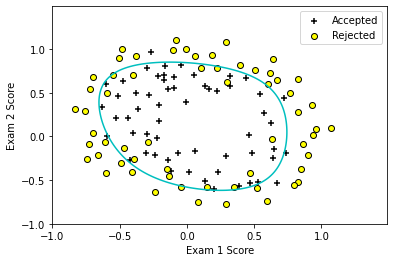

In [18]:
accepted_idx = (y==1).T[0]
not_accepted_idx = ~accepted_idx
accepted = data[accepted_idx, :-1]
not_accepted = data[~accepted_idx, :-1]

X1 = np.arange(-1, 1.5, 0.01) # x 列
X2 = np.arange(-1, 1.5, 0.01) # y 行

X_ = map_feature(X1, X2, 6)
xv, yv = np.meshgrid(X1, X2)

zv = np.empty((len(X1), len(X2)))

row = np.empty_like(X2)
for i, iv in enumerate(X2):
    row[:] = iv
     # X1 X2 个数相同的 1-D
     # 才可以整行计算
    zv[i] = np.ravel(map_feature(X1, row, 6) @ np.expand_dims(g, axis=1))

print(xv.shape, yv.shape, zv.shape)


fig, ax = plt.subplots()

ax.scatter(
    accepted[:, 0],
    accepted[:, 1],
    c='black',
    marker='+',
    label='Accepted',
)
ax.scatter(
    not_accepted[:, 0],
    not_accepted[:, 1],
    c='yellow',
    marker='o',
    edgecolors='black',
    label='Rejected',
)
ax.contour(xv, yv, zv, [0], colors='c')

ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

ax.legend()

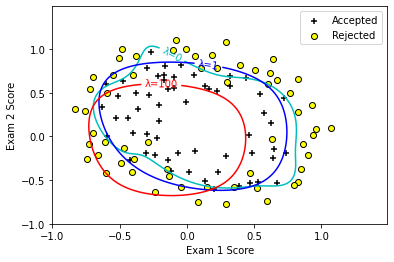

In [19]:
accepted_idx = (y==1).T[0]
not_accepted_idx = ~accepted_idx
accepted = data[accepted_idx, :-1]
not_accepted = data[~accepted_idx, :-1]


fig, ax = plt.subplots()

ax.scatter(
    accepted[:, 0],
    accepted[:, 1],
    c='black',
    marker='+',
    label='Accepted',
)
ax.scatter(
    not_accepted[:, 0],
    not_accepted[:, 1],
    c='yellow',
    marker='o',
    edgecolors='black',
    label='Rejected',
)
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')


X1 = np.arange(-1, 1.5, 0.01) # x 列
X2 = np.arange(-1, 1.5, 0.01) # y 行
for l in [0, 1, 100]:

    g, *_ = fmin_tnc(
        func=reg_cost_fn,
        x0=theta,
        # fprime若为 None，func 应返回 cost 和 gradient
        fprime=reg_gradient_fn,
        # 将会传递给 func (and fprime)
        args=(X, y, l),
    )
    
    X_ = map_feature(X1, X2, 6)
    xv, yv = np.meshgrid(X1, X2)

    zv = np.empty((len(X1), len(X2)))

    row = np.empty_like(X2)
    for i, iv in enumerate(X2):
        row[:] = iv
        # X1 X2 个数相同的 1-D
        # 才可以整行计算
        zv[i] = np.ravel(map_feature(X1, row, 6) @ np.expand_dims(g, axis=1))
    if l==0:
        c = 'c'
    elif l==1:
        c = 'b'
    elif l==100:
        c = 'r'
    else:
        c = 'r'
    cs = ax.contour(xv, yv, zv, [0], colors=c)
    ax.clabel(cs, cs.levels, inline=True, fmt=f'λ={l}', fontsize=10)

ax.legend()